# **Importing Modules and Dependencies**

In [ ]:
# %cd /content/drive/MyDrive/NAAMII_research_assistant/data/

In [ ]:
# !zip -r train.zip train

In [ ]:
# from google.colab import files
# files.download('train.zip')

In [ ]:
# !zip -r test.zip test

In [ ]:
# from google.colab import files
# files.download('test.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
from torch.optim.lr_scheduler import _LRScheduler
import torch.utils.data as data

import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models

from sklearn import decomposition
from sklearn import manifold
from sklearn.metrics import confusion_matrix
from tqdm.notebook import tqdm, trange
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

import copy
from collections import namedtuple
import os
import random
import shutil
import time

In [ ]:
SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

# **Data**

In [ ]:
# # create the train and test folders
# os.makedirs(os.path.join(train_path, 'Parasitized'))
# os.makedirs(os.path.join(train_path, 'Uninfected'))
# os.makedirs(os.path.join(test_path, 'Parasitized'))
# os.makedirs(os.path.join(test_path, 'Uninfected'))

In [ ]:
# print(len(os.listdir(f'{src_path}/images/Parasitized')))
# print(len(os.listdir(f'{src_path}/images/Uninfected')))

In [ ]:
# 0.8*13779

In [ ]:
# TRAIN_RATIO = 0.8

# data_dir = os.path.join(src_path)
# images_dir = os.path.join(data_dir, 'images')
# train_dir = os.path.join(data_dir, 'train')
# test_dir = os.path.join(data_dir, 'test')

# # if os.path.exists(train_dir):
# #     shutil.rmtree(train_dir) 
# # if os.path.exists(test_dir):
# #     shutil.rmtree(test_dir)
    
# # os.makedirs(train_dir)
# # os.makedirs(test_dir)

# classes = os.listdir(images_dir)

# for c in classes:
    
#     class_dir = os.path.join(images_dir, c)
    
#     images = os.listdir(class_dir)
       
#     n_train = int(len(images) * TRAIN_RATIO)
    
#     train_images = images[:n_train]
#     test_images = images[n_train:]
    
#     os.makedirs(os.path.join(train_dir, c), exist_ok = True)
#     os.makedirs(os.path.join(test_dir, c), exist_ok = True)
    
#     for image in train_images:
#         image_src = os.path.join(class_dir, image)
#         image_dst = os.path.join(train_dir, c, image) 
#         shutil.copyfile(image_src, image_dst)
        
#     for image in test_images:
#         image_src = os.path.join(class_dir, image)
#         image_dst = os.path.join(test_dir, c, image) 
#         shutil.copyfile(image_src, image_dst)

In [ ]:
# os.listdir(images_dir)

In [ ]:
# # set the percentage of data to use for testing
# test_percent = 0.2

# # loop through the source folders and copy files to the train or test folders
# for folder_name in os.listdir(src_path):
#     folder_path = os.path.join(src_path, folder_name)
#     if os.path.isdir(folder_path):
#         files = os.listdir(folder_path)
#         num_test = int(len(files) * test_percent)
#         test_files = random.sample(files, num_test)
#         for file_name in files:
#             src_file = os.path.join(folder_path, file_name)
#             if file_name in test_files:
#                 dst_folder = os.path.join(test_path, folder_name)
#             else:
#                 dst_folder = os.path.join(train_path, folder_name)
#             dst_file = os.path.join(dst_folder, file_name)
#             shutil.copy(src_file, dst_file)

In [ ]:
root='drive/MyDrive/NAAMII_research_assistant/data'
train_data = datasets.ImageFolder(root=f'{root}/train',
                                  transform=transforms.ToTensor()) #0-255 to 0-1

In [ ]:
test_data = datasets.ImageFolder(root=f'{root}/test',
                                  transform=transforms.ToTensor()) #0-255 to 0-1

In [ ]:
#show img and label
count=0
for img, label in train_data:
  count=count+1
  print(f'{img}   /   {label}')
  if count>3:
    break

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])   /   0
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 

In [ ]:
root_path='drive/MyDrive/NAAMII_research_assistant/data'

print('train')
for folder in train_data.classes:
  print(f'{folder} - {len(os.listdir(os.path.join(f"{root_path}/train",folder)))}')
print('\n')

print('test')
for folder in test_data.classes:
  print(f'{folder} - {len(os.listdir(os.path.join(f"{root_path}/test",folder)))}')
print('\n')

train
Parasitized - 11023
Uninfected - 10975


test
Parasitized - 2756
Uninfected - 2756




In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
pretrained_size = 224
pretrained_means = [0.485, 0.456, 0.406]
pretrained_stds= [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                           transforms.Resize(pretrained_size),
                           transforms.RandomRotation(5),
                           transforms.RandomHorizontalFlip(0.5),
                           transforms.RandomCrop(pretrained_size, padding = 10),
                           transforms.ToTensor(),
                           transforms.Normalize(mean = pretrained_means, 
                                                std = pretrained_stds)
                       ])

test_transforms = transforms.Compose([
                           transforms.Resize(pretrained_size),
                           transforms.CenterCrop(pretrained_size),
                           transforms.ToTensor(),
                           transforms.Normalize(mean = pretrained_means, 
                                                std = pretrained_stds)
                       ])

In [ ]:
train_data=datasets.ImageFolder(root=f'{root_path}/train',
                                  transform=train_transforms)

test_data = datasets.ImageFolder(root=f'{root_path}/test',
                                  transform=test_transforms)

In [ ]:
print(len(train_data))
print(len(test_data))

21998
5512


In [ ]:
train_loader=data.DataLoader(train_data,
                             batch_size=32,
                             shuffle=True)

test_loader=data.DataLoader(test_data,
                             batch_size=16,
                             shuffle=True)

In [ ]:
print(len(train_loader))
print(len(test_loader))

688
345


In [ ]:
classes=train_data.classes
print(classes)
num_classes=len(classes)
print(num_classes)

['Parasitized', 'Uninfected']
2


# **Model**

In [ ]:
class ResNet(nn.Module):
    def __init__(self, config, output_dim):
        super().__init__()
                
        block, n_blocks, channels = config
        self.in_channels = channels[0]
            
        assert len(n_blocks) == len(channels) == 4
        
        self.conv1 = nn.Conv2d(3, self.in_channels, kernel_size = 7, stride = 2, padding = 3, bias = False)
        self.bn1 = nn.BatchNorm2d(self.in_channels)
        self.relu = nn.ReLU(inplace = True)
        self.maxpool = nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1)
        
        self.layer1 = self.get_resnet_layer(block, n_blocks[0], channels[0])
        self.layer2 = self.get_resnet_layer(block, n_blocks[1], channels[1], stride = 2)
        self.layer3 = self.get_resnet_layer(block, n_blocks[2], channels[2], stride = 2)
        self.layer4 = self.get_resnet_layer(block, n_blocks[3], channels[3], stride = 2)
        
        self.avgpool = nn.AdaptiveAvgPool2d((1,1))
        self.fc = nn.Linear(self.in_channels, output_dim)
        
    def get_resnet_layer(self, block, n_blocks, channels, stride = 1):
    
        layers = []
        
        if self.in_channels != block.expansion * channels:
            downsample = True
        else:
            downsample = False
        
        layers.append(block(self.in_channels, channels, stride, downsample))
        
        for i in range(1, n_blocks):
            layers.append(block(block.expansion * channels, channels))

        self.in_channels = block.expansion * channels
            
        return nn.Sequential(*layers)
        
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        
        x = self.avgpool(x)
        h = x.view(x.shape[0], -1)
        x = self.fc(h)
        
        return x, h

In [ ]:
ResNetConfig = namedtuple('ResNetConfig', ['block', 'n_blocks', 'channels'])

In [ ]:
class Bottleneck(nn.Module):
    
    expansion = 4
    
    def __init__(self, in_channels, out_channels, stride = 1, downsample = False):
        super().__init__()
    
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size = 1, 
                               stride = 1, bias = False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size = 3, 
                               stride = stride, padding = 1, bias = False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        
        self.conv3 = nn.Conv2d(out_channels, self.expansion * out_channels, kernel_size = 1,
                               stride = 1, bias = False)
        self.bn3 = nn.BatchNorm2d(self.expansion * out_channels)
        
        self.relu = nn.ReLU(inplace = True)
        
        if downsample:
            conv = nn.Conv2d(in_channels, self.expansion * out_channels, kernel_size = 1, 
                             stride = stride, bias = False)
            bn = nn.BatchNorm2d(self.expansion * out_channels)
            downsample = nn.Sequential(conv, bn)
        else:
            downsample = None
            
        self.downsample = downsample
        
    def forward(self, x):
        
        i = x
        
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        
        x = self.conv3(x)
        x = self.bn3(x)
                
        if self.downsample is not None:
            i = self.downsample(i)
            
        x += i
        x = self.relu(x)
    
        return x

In [ ]:

resnet50_config = ResNetConfig(block = Bottleneck,
                               n_blocks = [3, 4, 6, 3],
                               channels = [64, 128, 256, 512])

# **Pretrained Model**

In [ ]:
pretrained_model = models.resnet50(pretrained = True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 240MB/s]


In [ ]:
print(pretrained_model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
IN_FEATURES = pretrained_model.fc.in_features 
OUTPUT_DIM = len(test_data.classes)

fc = nn.Linear(IN_FEATURES, 2)

In [ ]:
pretrained_model.fc = fc

In [ ]:
model = ResNet(resnet50_config, OUTPUT_DIM)

In [ ]:
model.load_state_dict(pretrained_model.state_dict())

<All keys matched successfully>

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 23,512,130 trainable parameters


In [ ]:
LR = 1e-3

params = [
          {'params': model.conv1.parameters(), 'lr': LR / 10},
          {'params': model.bn1.parameters(), 'lr': LR / 10},
          {'params': model.layer1.parameters(), 'lr': LR / 8},
          {'params': model.layer2.parameters(), 'lr': LR / 6},
          {'params': model.layer3.parameters(), 'lr': LR / 4},
          {'params': model.layer4.parameters(), 'lr': LR / 2},
          {'params': model.fc.parameters()}
         ]


optimizer = optim.Adam(params, lr =LR)

criterion = nn.CrossEntropyLoss()

model = model.to(device)
criterion = criterion.to(device)

In [ ]:
def calculate_accuracy(y_pred, y):
    top_pred = y_pred.argmax(1, keepdim=True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc

In [ ]:
from tqdm import tqdm


def train(model, iterator, optimizer, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    # count=0

    model.train()

    for (x, y) in tqdm(iterator, desc="Training", leave=False):

        # count=count+1

        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()

        y_pred, _ = model(x)

        loss = criterion(y_pred, y)

        acc = calculate_accuracy(y_pred, y)

        loss.backward()

        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

        # if count==1:
        #   break

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def evaluate(model, iterator, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    # count=0

    model.eval()

    with torch.no_grad():

        for (x, y) in tqdm(iterator, desc="Evaluating", leave=False):

            # count=count+1

            x = x.to(device)
            y = y.to(device)

            y_pred, _ = model(x)

            loss = criterion(y_pred, y)

            acc = calculate_accuracy(y_pred, y)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

            # if count==1:
            #   break

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
num_epochs=5
save_model_path=os.path.join('/content/drive/MyDrive/NAAMII_research_assistant/models/model_resnet.pt')

best_valid_loss = float('inf')

total_train_loss=[]
total_val_loss=[]

total_train_accuracy=[]
total_val_accuracy=[]

for epoch in trange(num_epochs,desc='Epochs'):
    
    start_time=time.monotonic()

    train_loss,train_accuracy=train(model,train_loader, optimizer,criterion,device)
    total_train_loss.append(train_loss)
    total_train_accuracy.append(train_accuracy)
    
    evaluate_loss,val_accuracy=evaluate(model,test_loader,criterion,device)
    total_val_loss.append(evaluate_loss)
    total_val_accuracy.append(val_accuracy)

    if evaluate_loss<best_valid_loss:
        best_valid_loss=evaluate_loss
        torch.save(model.state_dict(),save_model_path)

    end_time=time.monotonic()

    epoch_mins,epoch_sec=epoch_time(start_time,end_time)

    
    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_sec}s')
    print(f'\tTrain Loss: {train_loss}   |    Train accuracy: {train_accuracy}')
    print(f'\t Val. Loss: {evaluate_loss}   |   Val. accuacy: {val_accuracy}')

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]


Training: 100%|██████████| 688/688 [1:17:20<00:00,  5.35s/it]
                                                             
Evaluating: 100%|██████████| 345/345 [18:16<00:00,  2.69s/it]
                                                             

Epoch: 01 | Time: 95m 37s
	Train Loss: 0.15614936994334552   |    Train accuracy: 0.9490824854651163
	 Val. Loss: 0.15489598096658785   |   Val. accuacy: 0.9518115942028985



Training: 100%|██████████| 688/688 [05:32<00:00,  2.43it/s]
                                                           
Evaluating: 100%|█████████▉| 344/345 [00:40<00:00,  7.38it/s]
                                                             

Epoch: 02 | Time: 6m 14s
	Train Loss: 0.13144359928366273   |    Train accuracy: 0.955577761627907
	 Val. Loss: 0.13063134085319505   |   Val. accuacy: 0.9519927536231884



Training: 100%|██████████| 688/688 [05:34<00:00,  2.48it/s]
                                                           
Evaluating: 100%|█████████▉| 344/345 [00:41<00:00,  8.60it/s]
                                                             

Epoch: 03 | Time: 6m 15s
	Train Loss: 0.12301367138469116   |    Train accuracy: 0.9577125726744186
	 Val. Loss: 0.1392455069915108   |   Val. accuacy: 0.9492753623188406



Training: 100%|██████████| 688/688 [05:34<00:00,  2.49it/s]
                                                           
Evaluating: 100%|█████████▉| 344/345 [00:41<00:00,  8.52it/s]
                                                             

Epoch: 04 | Time: 6m 16s
	Train Loss: 0.12091243826665071   |    Train accuracy: 0.9583809178235919
	 Val. Loss: 0.16369142492396244   |   Val. accuacy: 0.9414855072463768



Training: 100%|██████████| 688/688 [05:36<00:00,  2.29it/s]
                                                           
Evaluating: 100%|█████████▉| 344/345 [00:41<00:00,  7.92it/s]
                                                             

Epoch: 05 | Time: 6m 18s
	Train Loss: 0.11231923275518903   |    Train accuracy: 0.9606649709302325
	 Val. Loss: 0.14912165624453969   |   Val. accuacy: 0.9432971014492754


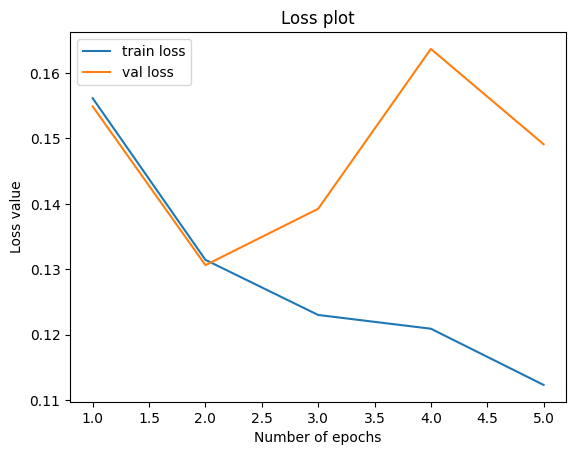

In [ ]:
epochs=[a for a in range(1,num_epochs+1)]
plt.plot(epochs,total_train_loss,label='train loss')
plt.plot(epochs,total_val_loss,label='val loss')
plt.title('Loss plot')
plt.xlabel('Number of epochs')
plt.ylabel('Loss value')

plt.legend()
plt.show()

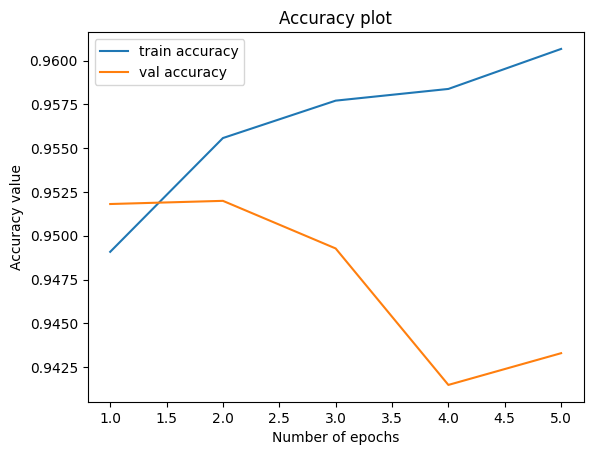

In [ ]:
epochs=[a for a in range(1,num_epochs+1)]
plt.plot(epochs,total_train_accuracy,label='train accuracy')
plt.plot(epochs,total_val_accuracy,label='val accuracy')
plt.title('Accuracy plot')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy value')

plt.legend()
plt.show()

# **Confusion Matrix**

In [ ]:
def get_predictions(model, iterator):

    model.eval()

    images = []
    labels = []
    probs = []

    with torch.no_grad():

        for (x, y) in tqdm(iterator):

            x = x.to(device)

            y_pred, _ = model(x)

            y_prob = F.softmax(y_pred, dim=-1)

            images.append(x.cpu())
            labels.append(y.cpu())
            probs.append(y_prob.cpu())

    images = torch.cat(images, dim=0)
    labels = torch.cat(labels, dim=0)
    probs = torch.cat(probs, dim=0)

    return images, labels, probs

In [ ]:
images, labels, probs = get_predictions(model, test_loader)

100%|██████████| 345/345 [00:40<00:00,  8.56it/s]


In [ ]:
pred_labels = torch.argmax(probs, 1)

In [ ]:
def plot_confusion_matrix(labels, pred_labels, classes):

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    cm = confusion_matrix(labels, pred_labels)
    cm = ConfusionMatrixDisplay(cm, display_labels=classes)
    cm.plot(values_format='d', cmap='Greens', ax=ax)
    plt.xticks(rotation=20)


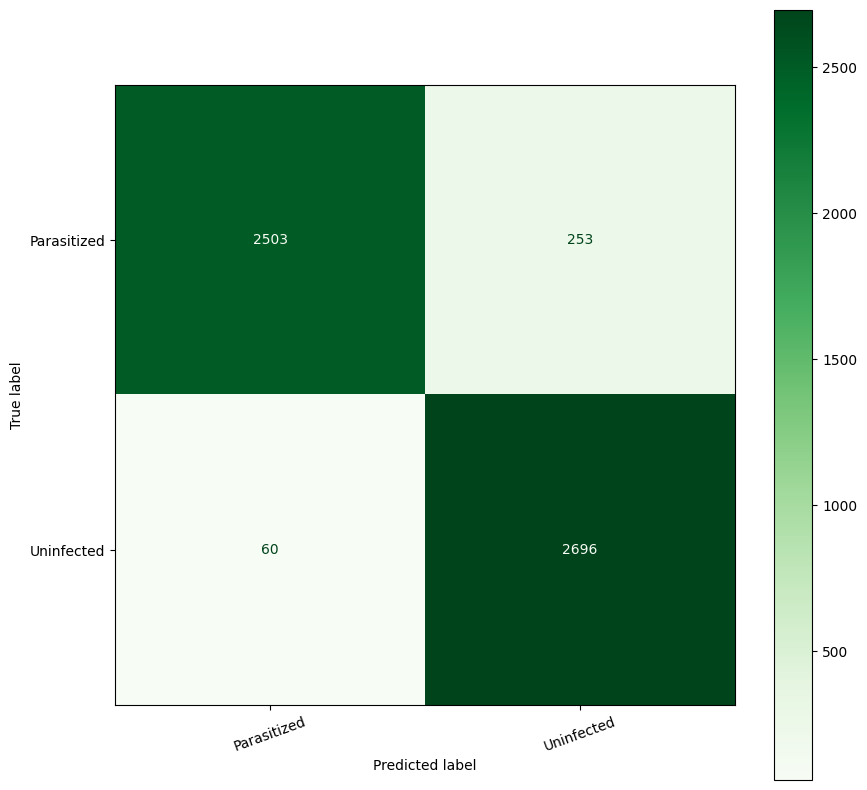

In [ ]:
plot_confusion_matrix(labels, pred_labels, classes)

In [ ]:
from sklearn.metrics import accuracy_score
# accuracy
accuracy_score(labels,pred_labels)

0.9432148040638607

In [ ]:
from sklearn.metrics import f1_score
#f1 score
f1_score(labels,pred_labels)

0.9451358457493426

In [ ]:
#precision
from sklearn.metrics import precision_score
precision_score(labels, pred_labels)

0.9142082061715836

In [ ]:
#recall
from sklearn.metrics import recall_score
recall_score(labels, pred_labels)

0.9782293178519593